In [1]:
%matplotlib inline
import pandas as pd

## Load results

In [2]:
series = [
    'masked',
    'unmasked',
    'masked_reversed',
    'unmasked_reversed',
]
series_names = [
    'Masked',
    'Unmasked',
    'Masked R',
    'Unmasked R',
]
total_timess = {
   s: pd.read_csv(f'data/analysis4_no_symbolic_raw_fixed_{s}.csv')
   for s in series 
}

## Raw results

In [3]:
from ipywidgets import interact

In [4]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('masked', 'unmasked', 'masked_reversed', 'unmask…

## Comparison

In [5]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,Masked,Unmasked,Masked R,Unmasked R
Flow*,62.203230,53.198168,56.241524,65.440130
P,4.510850,11.202444,3.827142,14.569493
Q,17.824091,59.551076,36.729903,67.733270
P | G(Q),22.435891,71.042613,41.028832,82.775339
tentative eval,0.680032,2.886854,0.910306,2.563380
root detection,1.141466,3.480809,2.105310,3.998113
composing flowpipe,19.818726,62.081013,36.335060,71.419187
Total,84.821867,124.374549,97.436658,148.372361


In [6]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,Masked,Unmasked,Masked R,Unmasked R
Flow*,9.271114,5.695459,10.871657,7.735923
P,0.747356,1.372832,0.594588,2.565025
Q,2.362839,6.096992,4.373150,7.835957
P | G(Q),2.807102,6.753457,4.827006,9.658324
tentative eval,0.110441,0.227195,0.122147,0.319535
root detection,0.150946,0.396194,0.319645,0.567115
composing flowpipe,2.479677,5.914275,4.121043,8.227508
Total,10.760819,8.387741,14.189973,14.815410


In [7]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
Masked,4.510850,17.824091
Unmasked,11.202444,59.551076
Masked R,3.827142,36.729903
Unmasked R,14.569493,67.733270


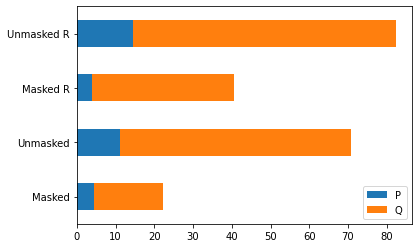

In [8]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [9]:
p.get_figure().savefig('images/comparison-analysis4-bar-chart.pdf')

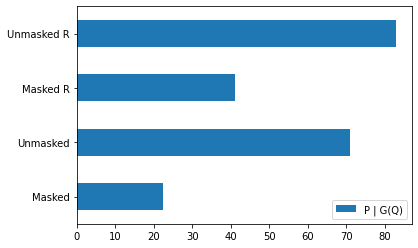

In [10]:
comparison3 = comparison.loc[['P | G(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [11]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
Masked,62.203230,4.510850,17.824091
Unmasked,53.198168,11.202444,59.551076
Masked R,56.241524,3.827142,36.729903
Unmasked R,65.440130,14.569493,67.733270


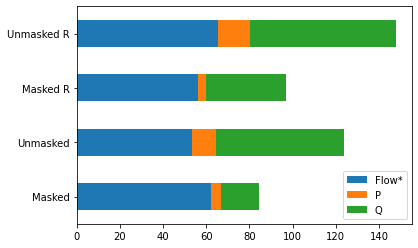

In [12]:
p = comparison4.plot(kind='barh', stacked=True, grid=False)
p

In [31]:
comparison5 = comparison4.copy()

In [30]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

Masked        0.283697
Unmasked      0.422861
Masked R      0.638089
Unmasked R    0.629467
dtype: float64

In [36]:
comparison5.loc[:,'Remainder'] = rem

In [37]:
comparison5

,Flow*,P,Q,Remainder
Masked,62.203230,4.510850,17.824091,0.283697
Unmasked,53.198168,11.202444,59.551076,0.422861
Masked R,56.241524,3.827142,36.729903,0.638089
Unmasked R,65.440130,14.569493,67.733270,0.629467


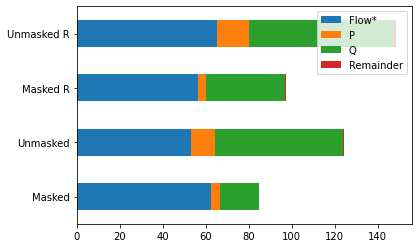

In [38]:
comparison5.plot(kind='barh', stacked=True, grid=False)